In [1]:
import sys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [3]:
df = pd.read_csv("uber.csv")

In [4]:
df.head(5)

START_DATE*       END_DATE* CATEGORY*       START*            STOP*  \
0  1/1/2016 21:11  1/1/2016 21:17  Business  Fort Pierce      Fort Pierce   
1   1/2/2016 1:25   1/2/2016 1:37  Business  Fort Pierce      Fort Pierce   
2  1/2/2016 20:25  1/2/2016 20:38  Business  Fort Pierce      Fort Pierce   
3  1/5/2016 17:31  1/5/2016 17:45  Business  Fort Pierce      Fort Pierce   
4  1/6/2016 14:42  1/6/2016 15:49  Business  Fort Pierce  West Palm Beach   

   MILES*         PURPOSE*  
0     5.1   Meal/Entertain  
1     5.0              NaN  
2     4.8  Errand/Supplies  
3     4.7          Meeting  
4    63.7   Customer Visit

In [5]:
df.tail()

START_DATE*         END_DATE* CATEGORY*            START*  \
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                 STOP*   MILES*        PURPOSE*  
1151  Unknown Location      3.9  Temporary Site  
1152  Unknown Location     16.2         Meeting  
1153           Gampaha      6.4  Temporary Site  
1154         Ilukwatta     48.2  Temporary Site  
1155               NaN  12204.7             NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.shape

(1156, 7)

In [8]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [9]:
df.isnull()

START_DATE*  END_DATE*  CATEGORY*  START*  STOP*  MILES*  PURPOSE*
0           False      False      False   False  False   False     False
1           False      False      False   False  False   False      True
2           False      False      False   False  False   False     False
3           False      False      False   False  False   False     False
4           False      False      False   False  False   False     False
...           ...        ...        ...     ...    ...     ...       ...
1151        False      False      False   False  False   False     False
1152        False      False      False   False  False   False     False
1153        False      False      False   False  False   False     False
1154        False      False      False   False  False   False     False
1155        False       True       True    True   True   False      True

[1156 rows x 7 columns]

In [10]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [11]:
print(df[df['END_DATE*'].isna()])

     START_DATE* END_DATE* CATEGORY* START* STOP*   MILES* PURPOSE*
1155      Totals       NaN       NaN    NaN   NaN  12204.7      NaN


In [12]:
print("for col stop ")
print(df[df['STOP*'].isna()])
print("for col category")
print(df[df['CATEGORY*'].isna()])
print("for col start")
print(df[df['START*'].isna()])

for col stop 
     START_DATE* END_DATE* CATEGORY* START* STOP*   MILES* PURPOSE*
1155      Totals       NaN       NaN    NaN   NaN  12204.7      NaN
for col category
     START_DATE* END_DATE* CATEGORY* START* STOP*   MILES* PURPOSE*
1155      Totals       NaN       NaN    NaN   NaN  12204.7      NaN
for col start
     START_DATE* END_DATE* CATEGORY* START* STOP*   MILES* PURPOSE*
1155      Totals       NaN       NaN    NaN   NaN  12204.7      NaN


In [13]:
df.drop(df[df['END_DATE*'].isna()].index,axis=0,inplace= True)

In [14]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [15]:
df.shape

(1155, 7)

In [16]:
df.columns=['Start_date','End_date','Category',
            'Start_loc','End_loc','Miles','Purpose']

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start_date  1155 non-null   object 
 1   End_date    1155 non-null   object 
 2   Category    1155 non-null   object 
 3   Start_loc   1155 non-null   object 
 4   End_loc     1155 non-null   object 
 5   Miles       1155 non-null   float64
 6   Purpose     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [18]:
df.Purpose = df.Purpose.replace(to_replace = np.nan , value='Missing Record')

In [19]:
df.isna().sum()

Start_date    0
End_date      0
Category      0
Start_loc     0
End_loc       0
Miles         0
Purpose       0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start_date  1155 non-null   object 
 1   End_date    1155 non-null   object 
 2   Category    1155 non-null   object 
 3   Start_loc   1155 non-null   object 
 4   End_loc     1155 non-null   object 
 5   Miles       1155 non-null   float64
 6   Purpose     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [21]:
df.duplicated().sum()

1

In [22]:
df[df.duplicated()]

Start_date         End_date  Category Start_loc End_loc  Miles  \
492  6/28/2016 23:34  6/28/2016 23:59  Business    Durham    Cary    9.9   

     Purpose  
492  Meeting

In [23]:
df.columns

Index(['Start_date', 'End_date', 'Category', 'Start_loc', 'End_loc', 'Miles',
       'Purpose'],
      dtype='object')

In [24]:
df.Purpose.value_counts()

Missing Record     502
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: Purpose, dtype: int64

In [25]:
df.Category.value_counts()

Business    1078
Personal      77
Name: Category, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start_date  1155 non-null   object 
 1   End_date    1155 non-null   object 
 2   Category    1155 non-null   object 
 3   Start_loc   1155 non-null   object 
 4   End_loc     1155 non-null   object 
 5   Miles       1155 non-null   float64
 6   Purpose     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [27]:
df['Start_date'] = pd.to_datetime(df['Start_date'])

In [28]:
df['End_date'] = pd.to_datetime(df['End_date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start_date  1155 non-null   datetime64[ns]
 1   End_date    1155 non-null   datetime64[ns]
 2   Category    1155 non-null   object        
 3   Start_loc   1155 non-null   object        
 4   End_loc     1155 non-null   object        
 5   Miles       1155 non-null   float64       
 6   Purpose     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [30]:
df['Month'] = df['End_date'].dt.month_name()

In [31]:
df['Day'] = df['End_date'].dt.day_name()

In [32]:
df.sample(3)

Start_date            End_date  Category         Start_loc  \
139 2016-02-20 12:41:00 2016-02-20 13:17:00  Business         Islamabad   
284 2016-03-29 20:29:00 2016-03-29 20:44:00  Personal          Sky Lake   
736 2016-08-29 15:49:00 2016-08-29 15:59:00  Business  Unknown Location   

               End_loc  Miles         Purpose     Month       Day  
139         R?walpindi   18.4  Missing Record  February  Saturday  
284  Sand Lake Commons    6.0  Missing Record     March   Tuesday  
736          Islamabad    2.8  Missing Record    August    Monday

In [33]:
pivot_Day = pd.pivot_table(data=df,index='Day',values='Category',aggfunc='count')
pivot_Day

Category
Day                
Friday          203
Monday          175
Saturday        150
Sunday          151
Thursday        154
Tuesday         173
Wednesday       149

In [34]:
P_Day = pivot_Day

<Axes: xlabel='Day'>

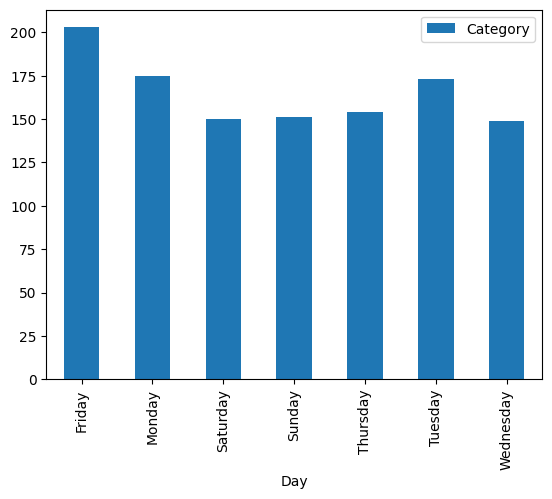

In [35]:
P_Day.plot.bar()

In [36]:
pivot_Month = pd.pivot_table(data=df,index='Month', values='Category',aggfunc='count')
pivot_Month

Category
Month              
April            54
August          133
December        146
February        115
January          61
July            112
June            108
March           113
May              49
November        122
October         106
September        36

In [37]:
p_month = pivot_Month

<Axes: ylabel='Month'>

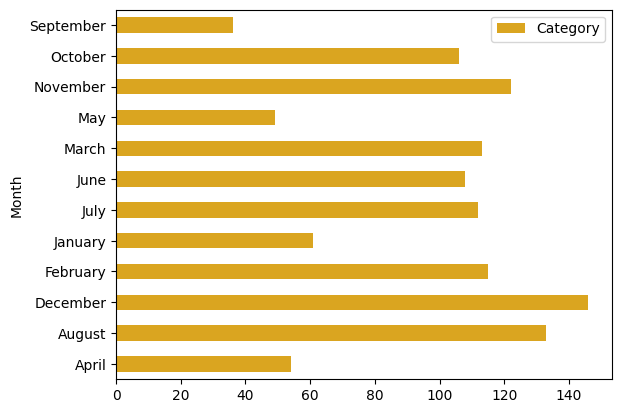

In [38]:
p_month.plot.barh(color='goldenrod')

In [39]:
df['Miles'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: Miles, dtype: float64

<Axes: >

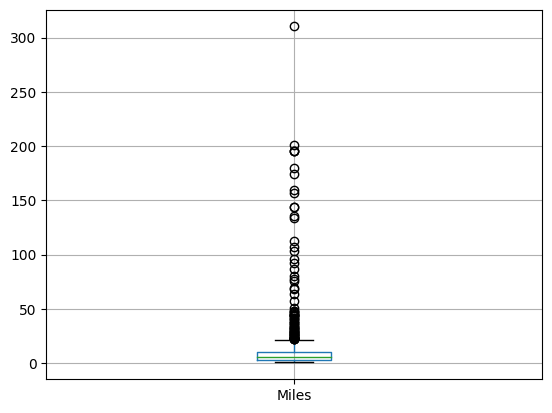

In [40]:
df.boxplot()

<Axes: ylabel='Miles'>

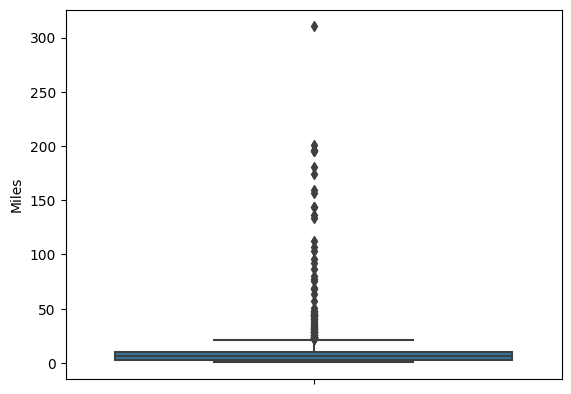

In [41]:
sns.boxplot(y='Miles',data=df)

<Axes: xlabel='Miles', ylabel='Day'>

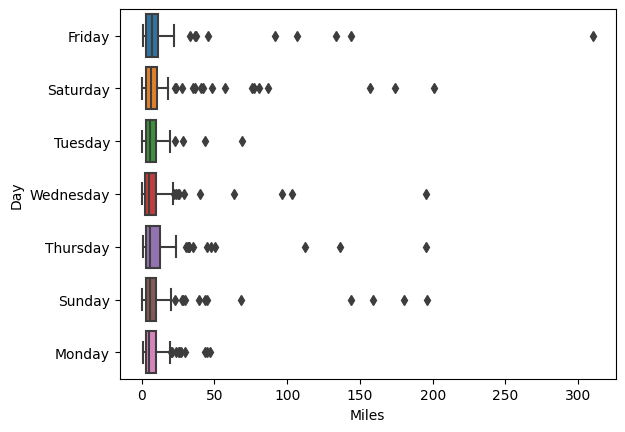

In [42]:
sns.boxplot(x='Miles', y= 'Day', data=df)

In [43]:
val_category = df['Category'].value_counts().to_frame().reset_index()
val_category

index  Category
0  Business      1078
1  Personal        77

<Axes: xlabel='index', ylabel='count'>

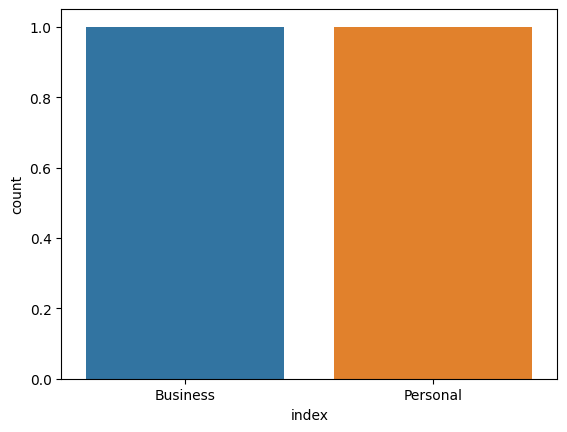

In [44]:
sns.countplot(x='index', data=val_category)

In [45]:
#purpose miles
pur_mile = df.groupby('Purpose').mean()
pur_mile

C:\Users\saura\AppData\Local\Temp\ipykernel_10512\616953414.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pur_mile = df.groupby('Purpose').mean()


Miles
Purpose                    
Airport/Travel     5.500000
Between Offices   10.944444
Charity ($)       15.100000
Commute          180.200000
Customer Visit    20.688119
Errand/Supplies    3.968750
Meal/Entertain     5.698125
Meeting           15.247594
Missing Record     9.748008
Moving             4.550000
Temporary Site    10.474000

In [46]:
mile = pur_mile

<Axes: ylabel='Purpose'>

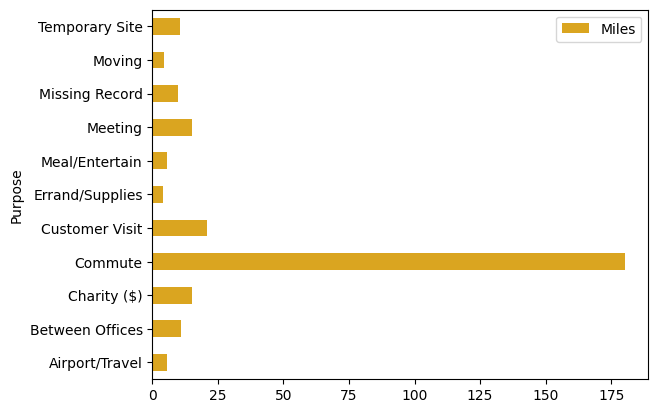

In [47]:
mile.plot.barh(color = 'goldenrod')

In [48]:
p_mile = mile.reset_index()
p_mile

Purpose       Miles
0    Airport/Travel    5.500000
1   Between Offices   10.944444
2       Charity ($)   15.100000
3           Commute  180.200000
4    Customer Visit   20.688119
5   Errand/Supplies    3.968750
6    Meal/Entertain    5.698125
7           Meeting   15.247594
8    Missing Record    9.748008
9            Moving    4.550000
10   Temporary Site   10.474000

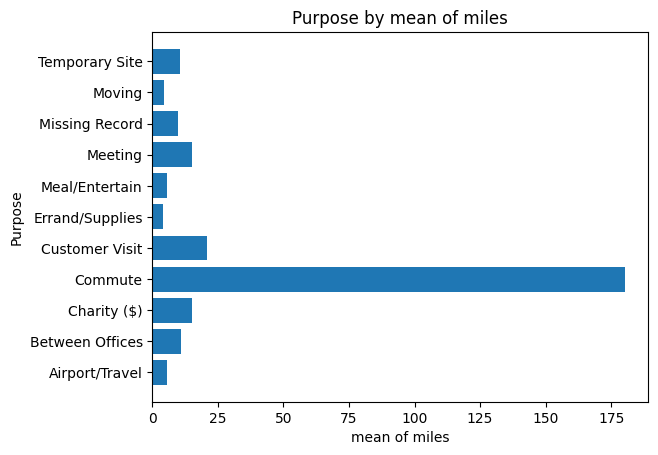

<Figure size 2000x1000 with 0 Axes>

In [49]:
plt.barh(p_mile['Purpose'],p_mile['Miles'])
plt.title('Purpose by mean of miles')
plt.xlabel('mean of miles')
plt.ylabel('Purpose')
plt.figure(figsize=(20,10))
plt.show()